## Augmented Dickey Fuller Test

In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller

In [2]:
#importing data

df = pd.read_csv('Electric_Production.csv')

#checking first 5 rows

df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [3]:
#checking the general info 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [4]:
#rename columns

df.rename(columns={'DATE':'Date','IPG2211A2N':'Electricity_Production'},inplace=True)
df.head()

,Date,Electricity_Production
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [5]:
#changing the data type of Date column

df['Date'] = pd.to_datetime(df.Date)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    397 non-null    datetime64[ns]
 1   Electricity_Production  397 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


In [7]:
df.describe()

,Electricity_Production
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


In [8]:
#set the Date column as index

df.set_index('Date',inplace=True)
df.head()

,Electricity_Production
Date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


Text(0, 0.5, 'Production')

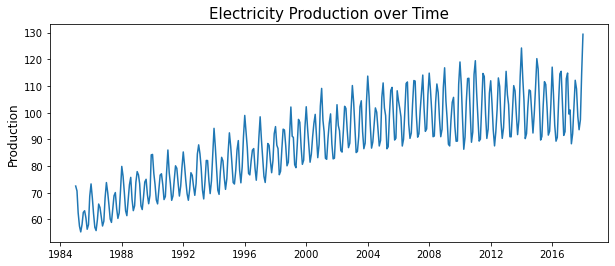

In [9]:
#plot the time series

plt.figure(figsize=(10,4))

plt.plot(df['Electricity_Production'])


plt.title('Electricity Production over Time', fontsize=15)
plt.ylabel('Production', fontsize=12)

From the above plot, we can observe that the time series in not stationary because an increasing trend results in a varying mean. But to further confirm our assumption, we will perfrom **Augmented Dickey-Fuller Test**.

In [10]:
#function for Augmented Dickey Fuller Test

def adf_test(timeseries):
    print('Results of Augmented Dickey Fuller Test:')
    print('----------------------------------------')
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4],
                        index = ['Test Statistics','p-value','Numner of Lags','Number of Observations Used'])
     
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    print('----------------------------------------')
    
    if dftest[0] < dftest[4]["5%"]:
        print ("Reject Ho - Time Series is Stationary")
    else:
        print ("Failed to Reject Ho -> Time Series is Non-Stationary")

In [11]:
adf_test(df['Electricity_Production'])

Results of Augmented Dickey Fuller Test:
----------------------------------------
Test Statistics                 -2.256990
p-value                          0.186215
Numner of Lags                  15.000000
Number of Observations Used    381.000000
Critical Value (1%)             -3.447631
Critical Value (5%)             -2.869156
Critical Value (10%)            -2.570827
dtype: float64
----------------------------------------
Failed to Reject Ho -> Time Series is Non-Stationary


From the result of ADF test, we confirm that the time series is **non-stationary**.<br>

---